In [9]:
import pandas as pd
# Load the dataset
data = pd.read_csv(r"C:\Users\DANIEL\Downloads\twitter_training.csv\twitter_training.csv")
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [10]:
import pandas as pd


# Load data from file
data = pd.read_csv(r"C:\Users\DANIEL\Downloads\twitter_training.csv\twitter_training.csv")

# Check column names
print(data.columns)

# Verify data loading
print(data.head())  # Display the first few rows of the data

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [11]:
# Manually assign column names
data.columns = ['id', 'topic', 'sentiment', 'text']
# Display the first few rows to confirm the correct assignment of column names
print(data.head())

     id        topic sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [12]:
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Convert all entries in the 'text' column to strings and handle missing values
data['text'] = data['text'].astype(str).fillna('')

# Function to clean the text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply the cleaning function to the correct text column
data['cleaned_text'] = data['text'].apply(clean_text)

# Display the first few rows of the cleaned data
print(data.head())

     id        topic sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                                        cleaned_text  
0  i am coming to the borders and i will kill you...  
1  im getting on borderlands and i will kill you all  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [13]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DANIEL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to get the sentiment score
def get_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']

# Apply the sentiment function to the cleaned text
data['sentiment_score'] = data['cleaned_text'].apply(get_sentiment)
data['sentiment_score']

0       -0.6908
1       -0.6908
2       -0.6908
3       -0.6908
4       -0.6908
          ...  
74676    0.0772
74677   -0.2960
74678   -0.2960
74679    0.0772
74680    0.3687
Name: sentiment_score, Length: 74681, dtype: float64

In [15]:
# Define sentiment based on the score
data['sentiment'] = data['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Set the style
sns.set(style="whitegrid")

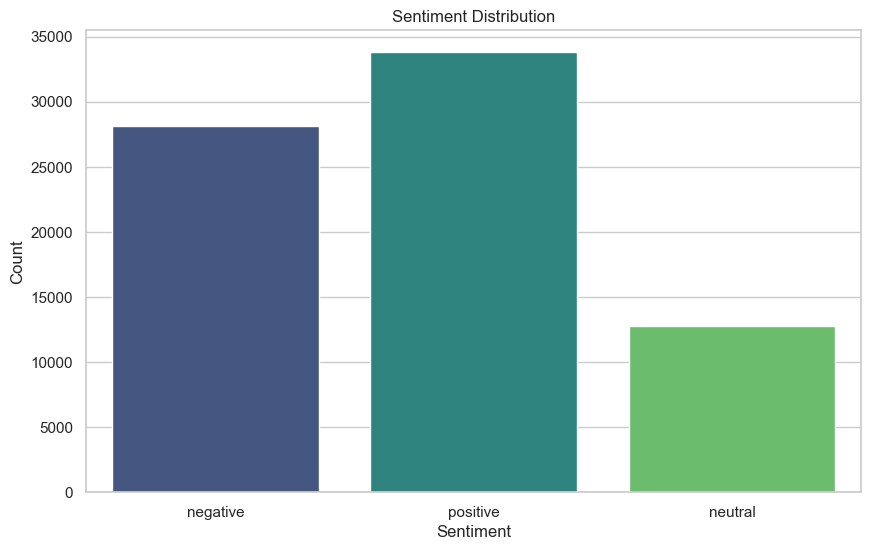

In [16]:
# Plot the distribution of sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


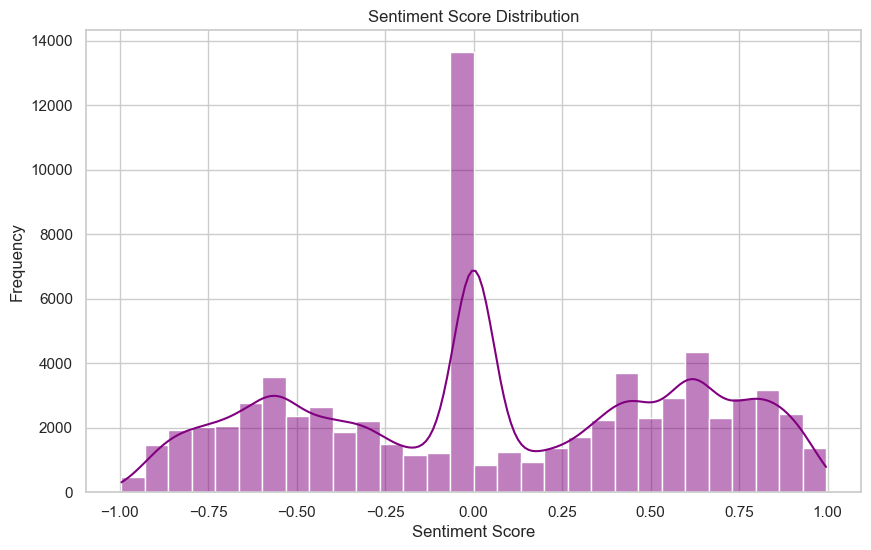

In [17]:
# Plot the sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment_score'], kde=True, bins=30, color='purple')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

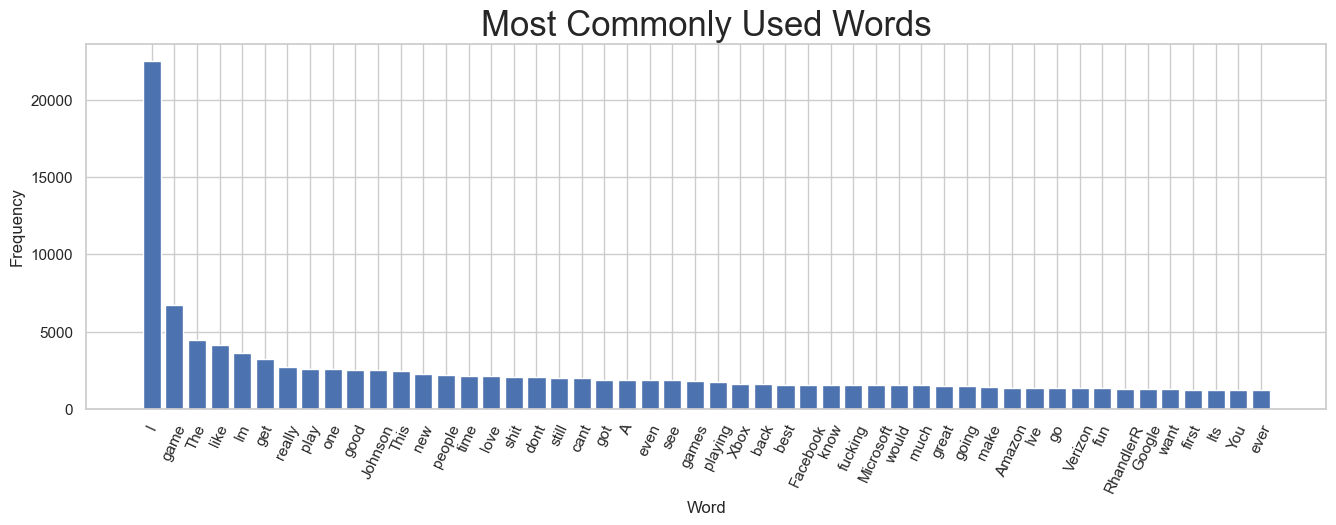

In [77]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




def Most_Words_used(text_column, num_of_words):
    all_text = ' '.join(data[text_column].values.astype(str))
    
    all_text = re.sub('<.*?>', '', all_text)  # HTML tags
    all_text = re.sub(r'\d+', '', all_text)  # numbers
    all_text = re.sub(r'[^\w\s]', '', all_text)  # special characters
    all_text = re.sub(r'http\S+', '', all_text)  # URLs or web links
    all_text = re.sub(r'@\S+', '', all_text)  # mentions
    all_text = re.sub(r'#\S+', '', all_text)  # hashtags
    
    words = all_text.split() 
    
    # remove punctuations
    punc = list(punctuation) 
    words = [word for word in words if word not in punc]
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    word_counts = Counter(words)
    top_words = word_counts.most_common(num_of_words)
    
    return top_words

top_words = Most_Words_used('text', 50)

xaxis = [word[0] for word in top_words]
yaxis = [word[1] for word in top_words]

plt.figure(figsize=(16, 5))
plt.bar(xaxis, yaxis)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words', fontsize=25)
plt.xticks(rotation=65)
plt.subplots_adjust(bottom=0.15)
plt.show()


In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DANIEL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
import nltk.data
print(nltk.data.path)

['C:\\Users\\DANIEL/nltk_data', 'c:\\Users\\DANIEL\\anaconda3\\nltk_data', 'c:\\Users\\DANIEL\\anaconda3\\share\\nltk_data', 'c:\\Users\\DANIEL\\anaconda3\\lib\\nltk_data', 'C:\\Users\\DANIEL\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [21]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Define the lemmatizer
lemma = WordNetLemmatizer()

# Define your DataPrep function
def DataPrep(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Remove punctuation, stopwords, and perform lemmatization
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    words = [lemma.lemmatize(word) for word in words]

    # Join the cleaned words back into a text
    cleaned_text = ' '.join(words)
    
    return cleaned_text


# Apply the DataPrep function to the 'text' column
data['cleaned_tweets'] = data['text'].apply(DataPrep)

# Display the first few rows of the cleaned data
print(data.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DANIEL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DANIEL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DANIEL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     id        topic sentiment  \
0  2401  Borderlands  negative   
1  2401  Borderlands  negative   
2  2401  Borderlands  negative   
3  2401  Borderlands  negative   
4  2401  Borderlands  negative   

                                                text  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                                        cleaned_text  sentiment_score  \
0  i am coming to the borders and i will kill you...          -0.6908   
1  im getting on borderlands and i will kill you all          -0.6908   
2  im coming on borderlands and i will murder you...          -0.6908   
3  im getting on borderlands 2 and i will murder ...          -0.6908   
4  im getting into borderlands and i can murder y...          -0.6908   

                 cl

In [22]:
    print(f'There are around {int(data["cleaned_tweets"].duplicated().sum())} duplicated tweets, we will remove them.')

There are around 14687 duplicated tweets, we will remove them.


In [23]:
data.drop_duplicates("cleaned_tweets", inplace=True)

In [24]:
data['tweet_len'] = [len(text.split()) for text in data.cleaned_tweets]
df = data[data['tweet_len'] < data['tweet_len'].quantile(0.995)]

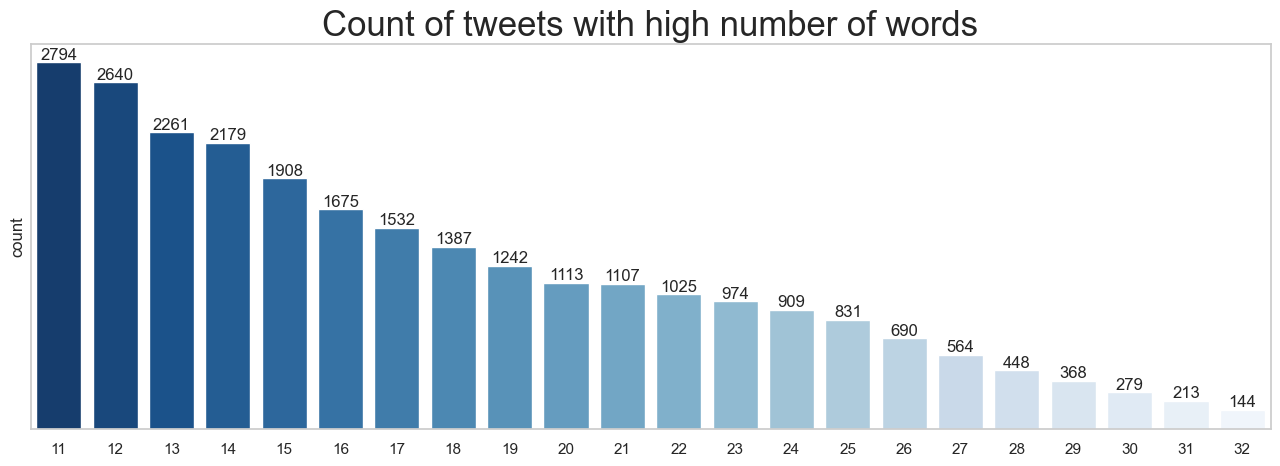

In [25]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='tweet_len', data=df[(df['tweet_len']<=1000) & (df['tweet_len']>10)], palette='Blues_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(data['cleaned_tweets'], data['sentiment'], train_size=0.85, random_state=42)

# Check the lengths of the training and validation sets
print(len(x_train), len(x_val))
print(len(y_train), len(y_val))

50994 9000
50994 9000


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
vec.fit(x_train)

# Get the feature names
feature_names = vec.get_feature_names_out()

print("No. of feature words: ", len(feature_names))

No. of feature words:  22482


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np  # Import NumPy if not already imported

# Convert your text data to lowercase before vectorization
x_train = [text.lower() for text in x_train]

# Create a TfidfVectorizer
vec = TfidfVectorizer()

# Transform the lowercase text data
x_train = vec.fit_transform(x_train)  # Keep it as a sparse matrix

# Transform the validation data in the same way
x_val = [text.lower() for text in x_val]
x_val = vec.transform(x_val)

In [29]:
from collections import Counter
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import precision_score, recall_score , f1_score, accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
import numpy as np


lb = LabelEncoder()

y_train = lb.fit_transform(y_train)
y_val = lb.fit_transform(y_val)

In [30]:
# Performing logistic Regression
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model
lr = LogisticRegression(random_state=42)

# Fit the model to your training data
lr.fit(x_train, y_train)

c:\Users\DANIEL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [31]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train , y_train)

c:\Users\DANIEL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [32]:
train_acc1 = lr.score(x_train , y_train)
lr_pred = lr.predict(x_val)

val_acc1 = accuracy_score(y_val , lr_pred) 

val_precision1 = precision_score(y_val , lr_pred , average='weighted')
val_recall1 = recall_score(y_val , lr_pred , average='weighted')
val_f1score1 = f1_score(y_val , lr_pred , average='weighted')
print(f"The training accuracy for logistic regression : {(train_acc1*100):0.2f}%\n")
print(f"The validation accuracy for logistic regression : {(val_acc1*100):0.2f}%\n")
print(f"The precision for logistic regression : {val_precision1:0.2f}\n")
print(f"The recall for logistic regression : {val_recall1:0.2f}\n")
print(f"The f1 score for logistic regression : {val_f1score1:0.2f}\n")

The training accuracy for logistic regression : 93.12%

The validation accuracy for logistic regression : 88.56%

The precision for logistic regression : 0.89

The recall for logistic regression : 0.89

The f1 score for logistic regression : 0.88



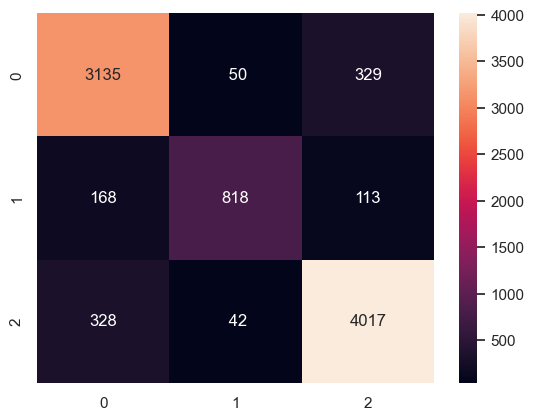

In [33]:
lr_cm = confusion_matrix(y_val , lr_pred)
sns.heatmap(lr_cm, annot=True,fmt='3g')
plt.show()

In [43]:
# Assuming your dataset has columns 'text' and 'sentiment'
# Preprocess text using tokenization, removal of stopwords, and lemmatization
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    clean_tokens = [lemma.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(clean_tokens)

data['cleaned_text'] = data['text'].astype(str).apply(preprocess_text)
x_train, x_val, y_train, y_val = train_test_split(data['cleaned_text'], data['sentiment'], train_size=0.85, random_state=42)
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
x_train_tfidf = vectorizer.fit_transform(x_train)
x_val_tfidf = vectorizer.transform(x_val)
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed
rf.fit(x_train_tfidf, y_train)
y_pred = rf.predict(x_val_tfidf)
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')


# Evaluate on training set
train_acc2 = rf.score(x_train_tfidf, y_train)

# Predict on validation set
rf_pred = rf.predict(x_val_tfidf)

# Calculate metrics on validation set
val_acc2 = accuracy_score(y_val, rf_pred)
val_precision2 = precision_score(y_val, rf_pred, average='weighted')
val_recall2 = recall_score(y_val, rf_pred, average='weighted')
val_f1score2 = f1_score(y_val, rf_pred, average='weighted')

print(f"The training accuracy for Random Forest: {(train_acc2*100):0.2f}%\n")
print(f"The validation accuracy for Random Forest: {(val_acc2*100):0.2f}%\n")
print(f"The precision for Random Forest: {val_precision2:0.2f}\n")
print(f"The recall for Random Forest: {val_recall2:0.2f}\n")
print(f"The f1 score for Random Forest: {val_f1score2:0.2f}\n")



Accuracy: 0.9044444444444445
The training accuracy for Random Forest: 99.75%

The validation accuracy for Random Forest: 90.44%

The precision for Random Forest: 0.90

The recall for Random Forest: 0.90

The f1 score for Random Forest: 0.90



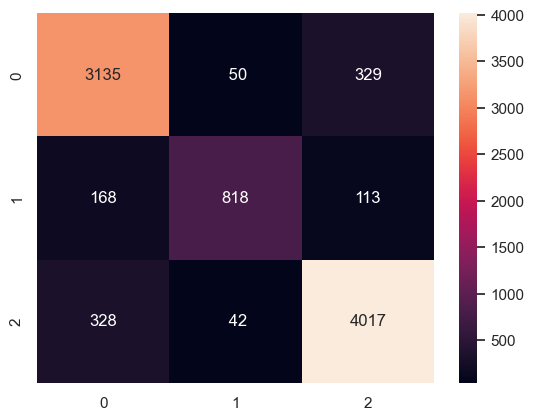

In [44]:
rf_cm = confusion_matrix(y_val , rf_pred)
sns.heatmap(lr_cm, annot=True,fmt='3g')
plt.show()

In [45]:
MAX_LEN = np.max(df['tweet_len'])
MAX_LEN

32

In [47]:
from tqdm.auto import tqdm 
def lstm_prep(column , seq_len) : 
    # create a vocab of words 
    corpus = [word for text in column for word in text.split()]
    words_count = Counter(corpus) 
    sorted_words = words_count.most_common()
    vocab_to_int = {w:i+1 for i , (w,c) in enumerate(sorted_words)}
    
    text_int = [] 
    
    for text in column : 
        token = [vocab_to_int[word] for word in text.split()]
        text_int.append(token)
        
        
    # padding 
    features = np.zeros((len(text_int) , seq_len) , dtype = int)
    for idx , y in tqdm(enumerate(text_int)) : 
        if len(y) <= seq_len : 
            zeros = list(np.zeros(seq_len - len(y)))
            new = zeros + y
            
        else : 
            new = y[:seq_len]
            
        features[idx,:] = np.array(new)
        
    return sorted_words, features
VOCAB , tokenized_column = lstm_prep(df['cleaned_tweets'] , MAX_LEN)

0it [00:00, ?it/s]

In [48]:
VOCAB[:10]

[('game', 9390),
 ('like', 4485),
 ('get', 3970),
 ('one', 3372),
 ('play', 3221),
 ('good', 3071),
 ('really', 2971),
 ('new', 2876),
 ('time', 2855),
 ('unk', 2832)]

In [49]:
len(VOCAB)

23345

In [50]:
tokenized_column.shape

(59618, 32)

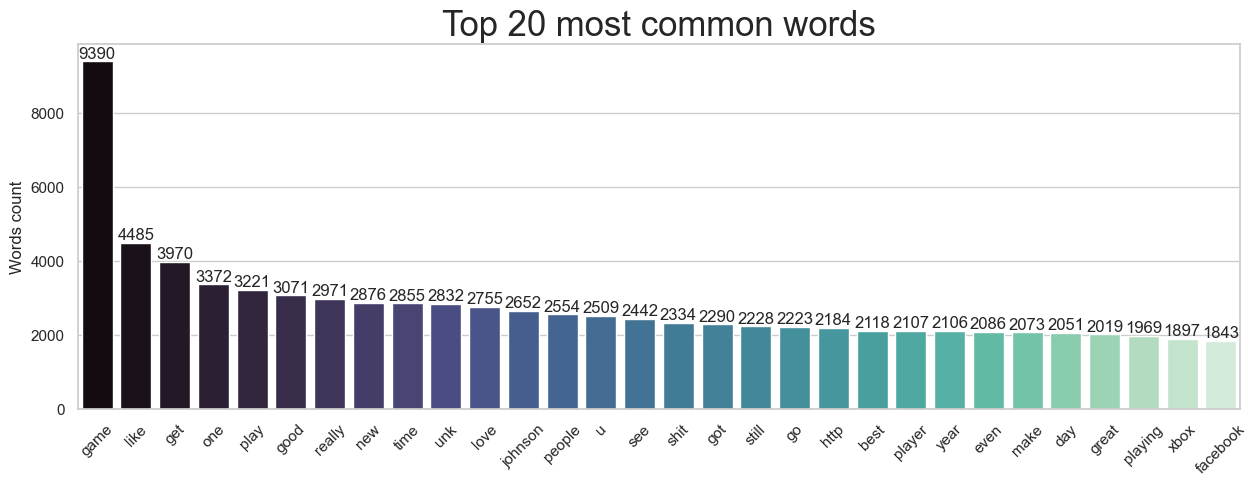

In [51]:
def most_common_words(vocab):
    keys = []
    values = []
    
    # Unpack the keys and values from the vocab list of tuples
    for key, value in vocab[:30]:
        keys.append(key)
        values.append(value)
        
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=keys, y=values, palette='mako')
    plt.title('Top 20 most common words', size=25)
    ax.bar_label(ax.containers[0])
    plt.ylabel("Words count")
    plt.xticks(rotation=45)
    plt.subplots_adjust(bottom=0.15)
    plt.show()

most_common_words(VOCAB)

In [55]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame with columns 'cleaned_tweets' and 'sentiment'
X = data['cleaned_tweets']  # Assuming 'cleaned_tweets' is your tokenized text column
y = data['sentiment']  # Assuming 'sentiment' is your target variable

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, y, train_size=0.85, random_state=42)

# Use TF-IDF to transform the text data
vectorizer = TfidfVectorizer(max_features=5000)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_val_tfidf = vectorizer.transform(x_val)

# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_tfidf, y_train)

# Make predictions
y_pred = rf.predict(x_val_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9044444444444445
Precision: 0.9048028458194601
Recall: 0.9044444444444445
F1 Score: 0.9045144448092498


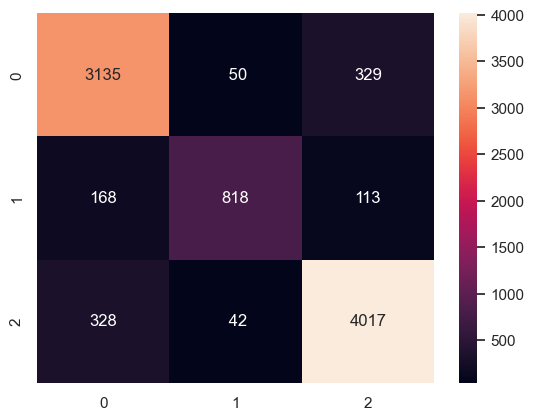

In [56]:
rf_cm = confusion_matrix(y_val , rf_pred)
sns.heatmap(lr_cm, annot=True,fmt='3g')
plt.show()

In [64]:
# Check if 'cleaned_tweets' and 'sentiment' columns exist in your DataFrame
if 'cleaned_tweets' in data.columns and 'sentiment' in data.columns:
    X = data['cleaned_tweets']
    y = data['sentiment']
    print(X)
    print(y)
else:
    print("Required columns 'cleaned_tweets' and/or 'sentiment' do not exist in the DataFrame.")


0                                       coming border kill
1                               im getting borderland kill
2                              im coming borderland murder
3                             im getting borderland murder
5        spent hour making something fun know huge bord...
                               ...                        
74675    realized window partition mac like year behind...
74677    realized mac window partition year behind nvid...
74678    realized window partition mac year behind nvid...
74679    realized window partition mac like year behind...
74680    like window partition mac like year behind dri...
Name: cleaned_tweets, Length: 59994, dtype: object
0        negative
1        negative
2        negative
3        negative
5        positive
           ...   
74675    positive
74677    negative
74678    negative
74679    positive
74680    positive
Name: sentiment, Length: 59994, dtype: object
